# Temperature Prediction

## Goals:
- By using **RandomForestRegressor**, we will build a temperature prediction model.
- Procedure:
    - Train and test the model with the wdata dataset.
    - To further test my model, predict the temperature in the 2021 January weather temperature.

### **What is RandomForestRegressor?**
    - Random Forest is an ensemble technique that can perform regression and classification with multiple decision trees and bagging. It determines the output based on its decision trees.
    - Random Forest Regressor takes the average value across all the predicted values of each decision trees
### **Why this method?**
    - Less pre-processing that needs to be done
    - Great with high dimensional data
    - Low Bias
    


## Import Modules

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from math import sqrt 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split

# Training the Model

In [2]:
wdata = pd.read_csv("cleaned_wdata.csv")

In [3]:
wdata.drop("Season",axis=1,inplace=True)

- Since Season column will not be needed in predicting the temperature, I will drop it.

## Setting dummies to Categorical Variables

In [4]:
# set dummies to the categorical variable
Condition = wdata[['Condition']]
Condition = pd.get_dummies(Condition)

In [5]:
WindDir = wdata[['Wind']]
WindDir = pd.get_dummies(WindDir)

- Require One Hot Encoding for Categorical variables such as 'Condition' and 'Wind'
    - As we have observed from the Exploratory Data Analysis, both condition of that hour and wind direction affect the temperauture.
    - As those two variables are categorical, we have to convert them into integer data so that they can be used as the input for the model

In [6]:
wdata = pd.concat([wdata,Condition,WindDir],axis=1)

In [7]:
wdata.drop(['Condition','Wind'],axis=1,inplace=True)

## Separating the Train set and Test set

In [8]:
X = wdata.drop(['Date','Temperature(F)'],axis=1)
y = wdata['Temperature(F)'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

## Training and Testing the Model

In [9]:
model = RandomForestRegressor(max_features='log2', min_samples_split=8,max_depth=64,
                      n_estimators=100)

In [10]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=64, max_features='log2', min_samples_split=8)

In [11]:
yhat = model.predict(X_test)

In [12]:
print("RMSE : {}".format(np.sqrt(mean_squared_error(yhat,y_test))))
print("r2 score is  : {}".format(r2_score(yhat,y_test)))

RMSE : 2.6647662983181366
r2 score is  : 0.9736849048479607


- It has r2 score of 0.97!
- However, the RMSE is relatively high, it might be due to overfitting. Let's test with new data to further investigate whether overfitting is affecting the model

# WeatherForecasting 2021 January 

- I have scraped hourly recorded weather in Toronto from 2021 January 1st to 31th.
- By using these dataset, we will predict the temperature in Toronto from 2021 January 1st to 31th.

## Pre-processing

- As the test dataset is not clean,Thus we have to clean the dataset similar to the method when we cleaned the wdata dataset.

In [13]:
# Forecasting 2021 January Temperature
datanew = pd.read_csv("weather2021Jan.csv")
datanew['Temperature'] = datanew['Temperature'].str.replace('F','').astype(int)
datanew['Dew Point'] = datanew['Dew Point'].str.replace('F','').astype(int)
datanew['Humidity'] = datanew['Humidity'].str.replace('%','').astype(int)
datanew['Wind Speed'] = datanew['Wind Speed'].str.replace('mph','').astype(int)
datanew['Wind Gust'] = datanew['Wind Gust'].str.replace('mph','').astype(int)
datanew['Pressure'] = datanew['Pressure'].str.replace('in','').astype(float)
datanew.drop("Precip.",axis=1,inplace=True)

In [14]:
datanew["Time"] = pd.to_datetime(datanew["Time"]).apply(lambda x:x.strftime('%H:%M'))

In [15]:
datanew['Date']=pd.to_datetime(datanew['Date'])

In [17]:
datanew['Time']=pd.to_datetime(datanew['Time'])
datanew.insert(1,column="Year",value=pd.Series(datanew['Date'].dt.year))
datanew.insert(2,column="Month",value=pd.Series(datanew['Date'].dt.month))
datanew.insert(3,column="Day",value=pd.Series(datanew['Date'].dt.day))
datanew.insert(4,column="Hour",value=pd.Series(datanew['Time'].dt.hour))
datanew.insert(5,column="Minute",value=pd.Series(datanew['Time'].dt.minute))

datanew.drop(['Time'],axis=1,inplace=True)

In [18]:
datanew.rename(columns = {'Temperature':'Temperature(F)','Dew Point':'Dew Point(F)','Humidity' : 'Humidity(F)',
                         'Wind Speed': 'Wind Speed(mph)','Wind Gust':'Wind Gust(mph)','Pressure':'Pressure(in)'
                       },inplace= True)

In [19]:
Condition2 = datanew[['Condition']]
Condition2 = pd.get_dummies(Condition2)
WindDir2 = datanew[['Wind']]
WindDir2 = pd.get_dummies(WindDir2)

In [20]:
datanew = pd.concat([datanew,Condition2,WindDir2],axis=1)

In [21]:
X_Jan = datanew.drop(['Date','Temperature(F)'],axis=1)
y_Jan = datanew["Temperature(F)"].values

In [23]:
X_inputMissing = list(set(X_train.columns) - set(X_Jan.columns))

In [24]:
for i in range(len(X_inputMissing)):
    X_Jan[X_inputMissing[i]] = 0

In [25]:
X_Jan.drop(['Condition','Wind'],axis=1,inplace=True)

In [26]:
Xcols = X_train.columns
X_Jan = X_Jan.reindex(columns=Xcols)

In [27]:
X_Jan

,Year,Month,Day,Hour,Minute,Dew Point(F),Humidity(F),Wind Speed(mph),Wind Gust(mph),Pressure(in),...,Wind_NW,Wind_S,Wind_SE,Wind_SSE,Wind_SSW,Wind_SW,Wind_VAR,Wind_W,Wind_WNW,Wind_WSW
0,2021,1,1,1,0,23,75,2,0,30.16,...,0,0,0,0,0,0,0,0,0,1
1,2021,1,1,2,0,25,80,2,0,30.16,...,0,0,0,0,0,0,0,0,0,1
2,2021,1,1,3,0,27,93,2,0,30.17,...,0,0,0,0,0,0,0,1,0,0
3,2021,1,1,4,0,27,93,3,0,30.18,...,0,0,0,0,0,0,0,0,1,0
4,2021,1,1,5,0,25,80,3,0,30.17,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,2021,1,31,21,0,14,68,21,29,29.87,...,0,0,0,0,0,0,0,0,0,0
1410,2021,1,31,21,23,14,68,24,30,29.86,...,0,0,0,0,0,0,0,0,0,0
1411,2021,1,31,22,0,16,74,23,31,29.86,...,0,0,0,0,0,0,0,0,0,0
1412,2021,1,31,23,0,16,80,23,0,29.86,...,0,0,0,0,0,0,0,0,0,0


## Prediction
- Now let's make the predictions!

In [28]:
yhat = model.predict(X_Jan)

In [29]:
print("The R2 is {:10.4f}".format(r2_score(yhat,y_Jan)))

The R2 is     0.8167


In [30]:
print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(yhat,y_Jan))))

Root Mean Squared Error: 2.2942516274447997


In [31]:
datanew['Predicted'] = yhat

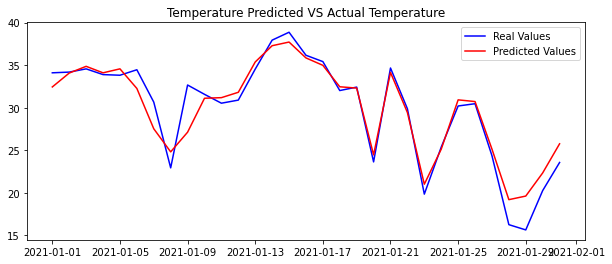

In [32]:
plt.figure(figsize=(10,4))
plt.plot(datanew.groupby(['Date']).mean().reset_index()['Date'],datanew.groupby('Date').mean()['Temperature(F)'],label='Real Values',color="blue")
plt.plot(datanew.groupby('Date').mean().reset_index()['Date'],datanew.groupby('Date').mean().reset_index()['Predicted'],label='Predicted Values',color="red")
plt.title("Temperature Predicted VS Actual Temperature")
plt.legend()

- As a result, approximately 82% of the observed variation can be explained by the model's inputs.
- Even though the r2 score dropped by more than 10% compared to the previous testing, the root mean squared error also dropped.
- Let's see whether we can further improve the model by tuning the parameter of the model with GridSearchCV!

## Tuning the Parameter
- Tuning the parameter with GridSearchCV to output optimized results

In [33]:
param_grid = { 
            "n_estimators"      : [50,100,200],
            "max_features"      : ["auto","log2"],
            "min_samples_split" : [8,10,12],
            "max_depth"         : [32,62,128]
            }


In [34]:
gscv = GridSearchCV(model,param_grid,verbose=1,cv=7)

In [35]:
gscv.fit(X_train,y_train)

Fitting 7 folds for each of 54 candidates, totalling 378 fits


GridSearchCV(cv=7,
             estimator=RandomForestRegressor(max_depth=64, max_features='log2',
                                             min_samples_split=8),
             param_grid={'max_depth': [32, 62, 128],
                         'max_features': ['auto', 'log2'],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [36]:
gscv.best_params_

{'max_depth': 128,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 100}

In [37]:
modelAfterTuning = RandomForestRegressor(max_depth =128,max_features = 'auto',min_samples_split= 8,n_estimators = 100)
modelAfterTuning.fit(X_train,y_train)

RandomForestRegressor(max_depth=128, min_samples_split=8)

In [41]:
yhatAfterTuning = modelAfterTuning.predict(X_Jan)
print("R2 : {:10.4f}".format(r2_score(yhatAfterTuning,y_Jan)))
print("RMSE : {}".format(np.sqrt(mean_squared_error(yhatAfterTuning,y_Jan))))

R2 :     0.9902
RMSE : 0.6095509673983219


- The RMSE between y_Jan and predicted values dropped significantly after the parameter tuning while r2 score remains high.

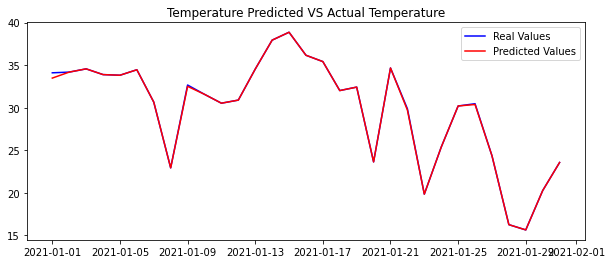

In [42]:
datanew['Predicted'] = yhatAfterTuning
plt.figure(figsize=(10,4))
plt.plot(datanew.groupby(['Date']).mean().reset_index()['Date'],datanew.groupby('Date').mean()['Temperature(F)'],label='Real Values',color="blue")
plt.plot(datanew.groupby('Date').mean().reset_index()['Date'],datanew.groupby('Date').mean().reset_index()['Predicted'],label='Predicted Values',color="red")
plt.title("Temperature Predicted VS Actual Temperature")
plt.legend()

- As we can see the lineplot, the predicted values are mostly very close to the actual values!